In [4]:
pip install -r requirements.txt

In [5]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
from rasterio.merge import merge
from rasterio.io import MemoryFile

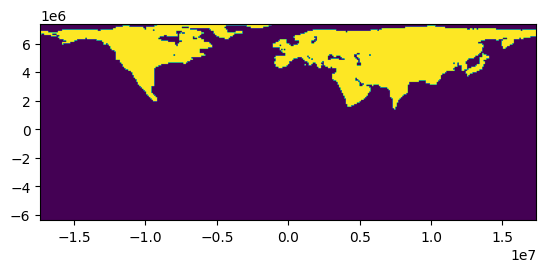

<AxesSubplot: >

In [6]:
doggo = "Data/Animal species/Present_natural/Canis_lupus.tif"
doggoImg = rasterio.open(doggo)
show(doggoImg)

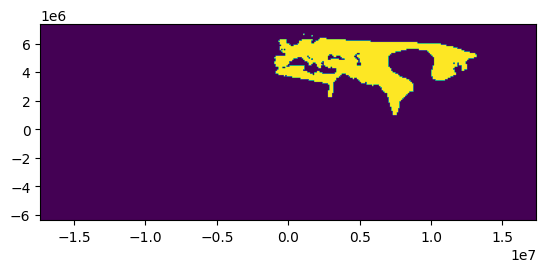

<AxesSubplot: >

In [7]:
cow = "Data/Animal species/Present_natural/Bos_primigenius.tif"
cowImg = rasterio.open(cow)
show(cowImg)

In [8]:
from pathlib import Path
pathlist = Path("Data/Animal species/").rglob('*.tif')

allAnimals = np.zeros((142,360))

for animalImagePath in pathlist:
     # because path is object not string
     animalArray = rasterio.open(str(animalImagePath)).read()[0]
     allAnimals += animalArray
     # print(path_in_str)

In [9]:
allAnimals.shape

(142, 360)

In [16]:
np.array(doggoImg.xy(0,0))/1e5

array([-173.19285864,   73.00124521])

In [10]:
latitudesLongitudesArray = np.array([[doggoImg.xy(k,j) for j in range(doggoImg.width)] for k in range(doggoImg.width)])

In [11]:
np.shape(latitudesLongitudesArray)

(142, 360, 2)

In [12]:
np.save("coordinatesGrid",latitudesLongitudesArray)

In [17]:
allAnimalsWithLatLong = np.zeros((doggoImg.height,doggoImg.width,3))

In [18]:
allAnimalsWithLatLong.shape

(142, 360, 3)

In [19]:
for j in range(doggoImg.width):
    for i in range(doggoImg.height):
            allAnimalsWithLatLong[i][j][0] = allAnimals[i][j]
            allAnimalsWithLatLong[i][j][1] = latitudesLongitudesArray[i][j][0]/1e5
            allAnimalsWithLatLong[i][j][2] = latitudesLongitudesArray[i][j][1]/1e5

In [20]:
allAnimalsWithLatLongArray = np.array(allAnimalsWithLatLong)

In [21]:
allAnimalsWithLatLong

array([[[   2.        , -173.19285864,   73.00124521],
        [   2.        , -172.22799592,   73.00124521],
        [   2.        , -171.26313319,   73.00124521],
        ...,
        [   2.        ,  171.26313319,   73.00124521],
        [   2.        ,  172.22799592,   73.00124521],
        [   2.        ,  173.19285864,   73.00124521]],

       [[   2.        , -173.19285864,   72.03609563],
        [   2.        , -172.22799592,   72.03609563],
        [   2.        , -171.26313319,   72.03609563],
        ...,
        [   2.        ,  171.26313319,   72.03609563],
        [   2.        ,  172.22799592,   72.03609563],
        [   2.        ,  173.19285864,   72.03609563]],

       [[   3.        , -173.19285864,   71.07094606],
        [   4.        , -172.22799592,   71.07094606],
        [   4.        , -171.26313319,   71.07094606],
        ...,
        [   3.        ,  171.26313319,   71.07094606],
        [   3.        ,  172.22799592,   71.07094606],
        [   3.        

In [85]:
np.save("animalBiodiversity", allAnimalsWithLatLong)